# 코로나 데이터 분석

`서울시 코로나19 확진자 현황` 데이터 : **탐색적 데이터 분석(EDA)** 

데이터 출처: https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15063273


1. **데이터 읽기:** 코로나 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악

## 1. 데이터 읽기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_corona = pd.read_csv("seoul_corona.csv")

In [3]:
# 상위 5개 데이터
df_corona.head()

,연번,확진달,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10,21,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10,21,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10,21,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10,21,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10,21,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [4]:
# display
display(df_corona.head(2), df_corona.tail(2))

,연번,확진달,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10,21,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10,21,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


,연번,확진달,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
5746,2,1,30,5,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5747,1,1,24,2,NaN,NaN,강서구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y


In [5]:
# dataframe 정보를 요약하여 출력합니다. 
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 15 columns):
연번      5748 non-null int64
확진달     5748 non-null int64
확진일     5748 non-null int64
환자번호    5748 non-null int64
국적      0 non-null float64
환자정보    0 non-null float64
지역      5748 non-null object
여행력     458 non-null object
접촉력     5748 non-null object
조치사항    0 non-null float64
상태      5357 non-null object
이동경로    5520 non-null object
등록일     5748 non-null object
수정일     5748 non-null object
노출여부    5748 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 673.7+ KB


In [6]:
df_corona.describe()

,연번,확진달,확진일,환자번호,국적,환자정보,조치사항
count,5748.000000,5748.000000,5748.000000,5748.000000,0.0,0.0,0.0
mean,2874.500000,7.506089,17.317850,17057.479819,NaN,NaN,NaN
std,1659.449005,1.923759,8.481592,5078.332051,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN
25%,1437.750000,7.000000,10.000000,13540.750000,NaN,NaN,NaN
50%,2874.500000,8.000000,18.000000,17328.500000,NaN,NaN,NaN
75%,4311.250000,9.000000,25.000000,21153.250000,NaN,NaN,NaN
max,5748.000000,10.000000,31.000000,25530.000000,NaN,NaN,NaN


In [7]:
df_corona.shape

(5748, 15)

## 2. 데이터 정제

결측값(missing data), 이상치(outlier)를 처리

#### 2.1 비어있는 column 지우기

`corona_all.info()` 코드를 통하여 `국적`, `환자정보`, `조치사항` 에 해당하는 데이터-> null

`dataframe.drop()`를 사용하여 불필요한 `국적`, `환자정보`, `조치사항` 의 column 데이터를 삭제하고 이 dataframe을 `corona_del_col`에 저장

In [8]:
# drop 함수를 사용하여 국적, 환자정보, 조치사항 coulmn 데이터를 삭제합니다.
df_corona.drop(columns = ['국적','환자정보','조치사항'], inplace = True)

In [9]:
# 정제 처리된 dataframe 정보를 출력합니다.
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 12 columns):
연번      5748 non-null int64
확진달     5748 non-null int64
확진일     5748 non-null int64
환자번호    5748 non-null int64
지역      5748 non-null object
여행력     458 non-null object
접촉력     5748 non-null object
상태      5357 non-null object
이동경로    5520 non-null object
등록일     5748 non-null object
수정일     5748 non-null object
노출여부    5748 non-null object
dtypes: int64(4), object(8)
memory usage: 539.0+ KB


## 3. 데이터 시각화

결측값을 처리한 `corona_del_col` 데이터를 바탕으로 각 column의 변수별 데이터 분포 시각화

### 3.1 확진달 & 확진일

`확진달`과 `확진일` 데이터를 출력

In [10]:
df_corona['확진달'].head()

0    10
1    10
2    10
3    10
4    10
Name: 확진달, dtype: int64

In [11]:
df_corona['확진달'][0:10] # Series는 슬라이싱 가능

0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
8    10
9    10
Name: 확진달, dtype: int64

In [12]:
df_corona['확진달'].nunique() , df_corona['확진달'].unique() # 튜플로 결과값 반환

(10, array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1]))

In [13]:
df_corona['확진일'].head()

0    21
1    21
2    21
3    21
4    21
Name: 확진일, dtype: int64

#### 3.1.1. 월별 확진자 수 출력

In [14]:
# mac 등에서는 설치 후 런타임 재시작
import matplotlib.font_manager as fm
fm._rebuild()

In [15]:
# 한글 출력을 도와주는 코드
import matplotlib.pyplot as plt
plt.rc('font', family='malgun gothic')

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(font='NanumGothic',
        rc={"axes.unicode_minus":False},
        style='darkgrid')


### rcParam은 rc의 상위개념

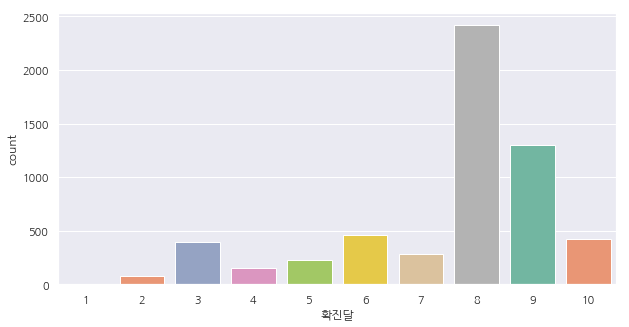

In [16]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))


ax = sns.countplot(x='확진달', data=df_corona, palette="Set2") # ax는 대시보드의 판넬이다!

확진자가 8월에 많다는 것을 파악

value_counts는 자체적으로 sorting해줌

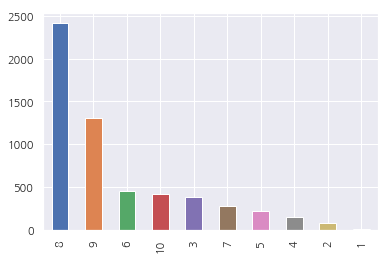

In [17]:
# series의 plot 함수를 사용한 출력 방법도 있습니다.
df_corona['확진달'].value_counts().plot(kind='bar')

In [18]:
# value_counts()는 각 데이터를 세어서 내림차순으로 정리하는 함수
df_corona['확진달'].value_counts()

8     2416
9     1304
6      460
10     425
3      391
7      281
5      228
4      156
2       80
1        7
Name: 확진달, dtype: int64

#### 3.1.2. 8월 일별 확진자 수 출력

월별 확진자 수를 출력해보면 알 수 있듯이 8월에 확진자 수가 가장 많았다.

8월 동안 확진자 수가 어떻게 늘었는지 일별 확진자 수를 막대그래프로 출력

####  플래그 시리즈 df_corona[df_corona['확진달'] == 8]

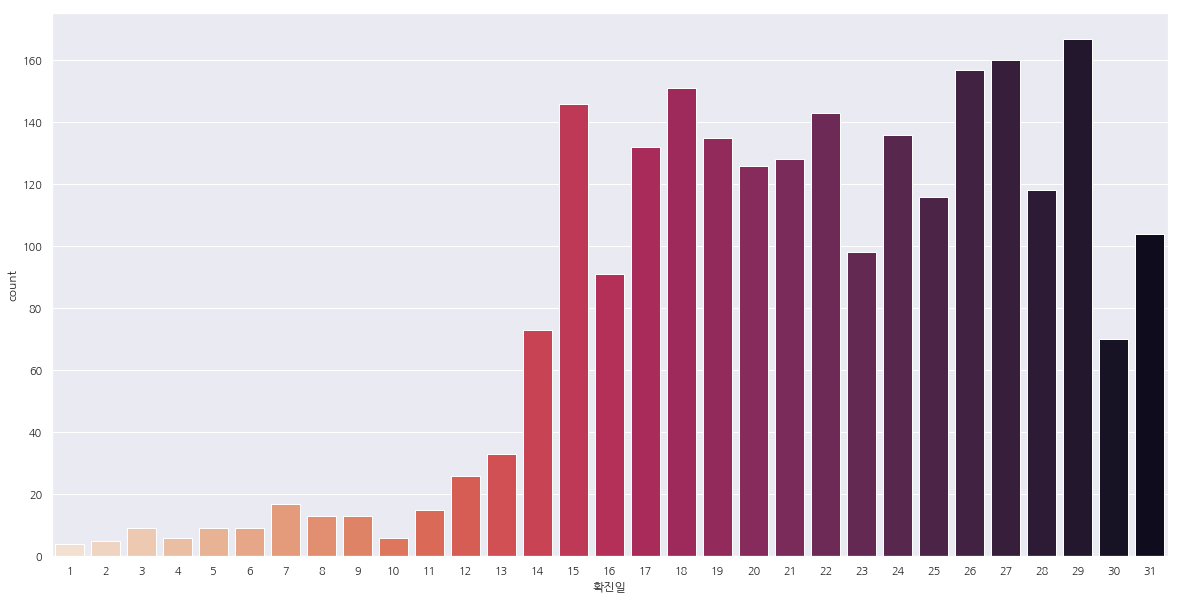

In [19]:
# seaborn의 countplot 함수
plt.figure(figsize=(20,10))
ax = sns.countplot(x="확진일", data=df_corona[df_corona['확진달'] == 8], palette="rocket_r")
# 플래그 시리즈 df_corona[df_corona['확진달'] == 8]

### 확진자가 급증한 날짜를 기점으로 데이터를 살펴보도록 한다

### 3.2. 지역

`지역` : `oo구` 형태의 문자열 데이터

In [20]:
df_corona['지역'][0:10]

0    양천구
1    강동구
2    강남구
3    관악구
4    관악구
5    구로구
6    관악구
7    관악구
8    관악구
9    관악구
Name: 지역, dtype: object

In [21]:
df_corona['지역'].nunique(),df_corona['지역'].unique()

(27, array(['양천구', '강동구', '강남구', '관악구', '구로구', '도봉구', '기타', '타시도', '송파구',
        '서초구', '성동구', '강서구', '중랑구', '성북구', '동작구', '용산구', '광진구', '은평구',
        '마포구', '서대문구', '노원구', '금천구', '종로구', '강북구', '동대문구', '중구', '영등포구'],
       dtype=object))

#### 3.2.1. 지역별 확진자 수 출력

이번에는 지역별로 확진자가 얼마나 있는지 막대그래프로 출력해 봅시다.

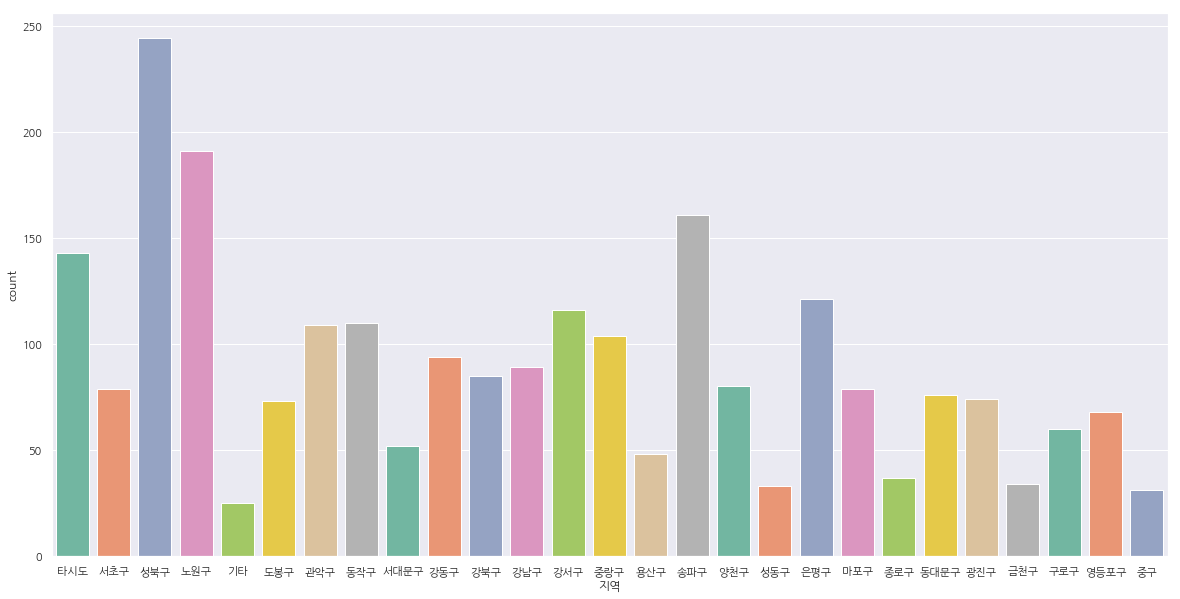

In [22]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="지역", data=df_corona[df_corona['확진달'] == 8], palette="Set2")

### 위험지역 : 관악구, 송파구, 노원구 ...
#### 코호트 분석
코호트? 집단, 그룹 
지역별, 나이별, 성별, ... 

#### 3.2.2. 8월달 지역별 확진자 수 출력

감염자가 많았던 8월에는 지역별로 확진자가 어떻게 분포되어 있는지 막대그래프로 출력

In [23]:
# 논리연산을 이용한 조건 사용
df_corona[df_corona['확진달'] == 8]

,연번,확진달,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부
1271,4477,8,31,20132,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
1272,4476,8,25,17968,타시도,NaN,성북구 사랑제일교회 관련,NaN,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
1273,4475,8,26,18821,타시도,NaN,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
1274,4474,8,27,18818,타시도,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
1504,4244,8,30,20116,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
1555,4193,8,23,20594,타시도,NaN,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
1629,4119,8,31,20260,서초구,NaN,서초구 장애인교육시설,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
1643,4105,8,31,20465,성북구,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
1655,4093,8,31,20319,노원구,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
1658,4090,8,16,20473,기타,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y


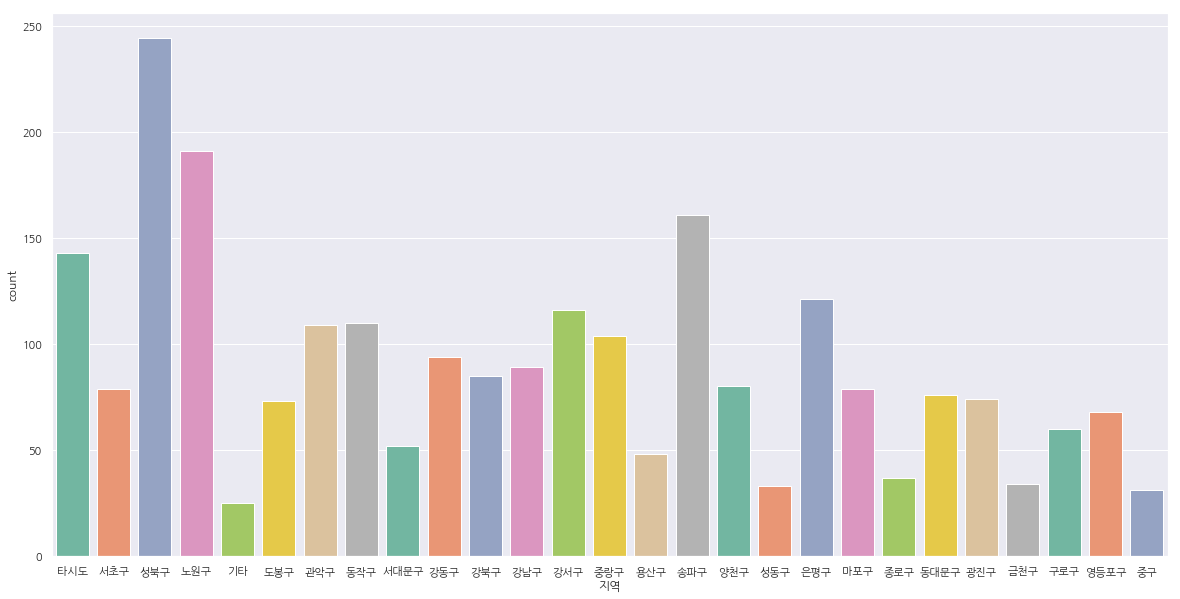

In [24]:
# 그래프를 출력합니다.
plt.figure(figsize=(20,10))
ax = sns.countplot(x="지역", data=df_corona[df_corona['확진달'] == 8], palette="Set2")

#### 3.2.3. 월별 관악구 확진자 수 출력

관악구 내의 월별 확진자 수 증가추세 확인

In [25]:
df_corona['확진달'][0:5] # Series형태

0    10
1    10
2    10
3    10
4    10
Name: 확진달, dtype: int64

In [26]:
# 해당 column을 지정하여 series 형태로 출력할 수 있습니다.
df_corona['확진달'][df_corona['지역'] == '관악구'][0:3]

3    10
4    10
6    10
Name: 확진달, dtype: int64

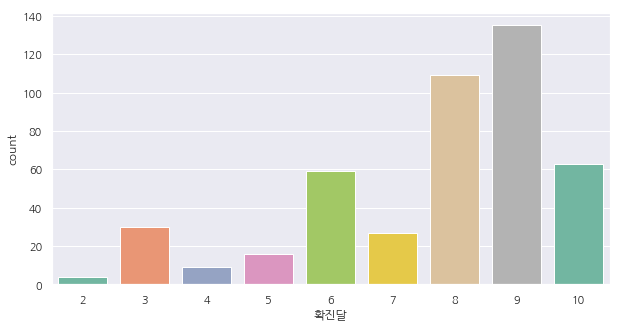

In [27]:
# 그래프를 출력합니다.
plt.figure(figsize=(10,5))
ax = sns.countplot(x='확진달', data=df_corona[df_corona['지역'] == '관악구'], palette="Set2")

### 관악구는 9월달에 확진자가 제일 많았다.

#### 3.2.4. 서울 지역에서 확진자를 지도에 출력

지도를 출력하기 위한 라이브러리로 folium을 사용해 봅시다.

In [28]:
!pip install folium

     |████████████████████████████████| 94 kB 2.0 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [29]:
# 지도 출력을 위한 라이브러리 folium을 import 합니다.
import folium

# Map 함수를 사용하여 지도를 출력합니다.
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11) # 축척 : zoom_start=11

map_osm

지역마다 지도에 정보를 출력하기 위해서는 각 지역의 좌표정보가 필요하므로

이를 해결하기 위해서 서울시 행정구역 시군 정보 데이터를 불러와 사용한다.

데이터 출처: https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [30]:
# CRS에 저장
CRS=pd.read_csv("seoul_info.csv")

In [31]:
# Dataframe을 출력
CRS

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


저장된 데이터에서 지역명이 `도봉구`인 데이터

In [32]:
CRS[CRS['시군구명_한글'] == '도봉구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767


for 문을 사용하여 지역마다 확진자를 원형 마커를 사용하여 지도에 출력

In [33]:
# 삭제될 데이터 확인
# df_corona[df_corona['지역'] == '타시도'].head(2)
# df_corona[df_corona['지역'] == '타시도'].index

In [34]:
# df_corona의 지역에는 'oo구' 이외로 `타시도`, `기타`에 해당되는 데이터가 존재
# 위 데이터에 해당되는 위도, 경도를 찾을 수 없기에 삭제하여 corona_seoul로 저장
corona_seoul = df_corona.drop(df_corona[df_corona['지역'] == '타시도'].index)
corona_seoul = corona_seoul.drop(corona_seoul[corona_seoul['지역'] == '기타'].index)

# 서울 가운데 좌표를 잡아 지도를 출력
map_osm = folium.Map(location=[37.529622, 126.984307],
                     zoom_start=12)

# 지역 정보를 set 함수를 사용하여 25개 고유의 지역을 출력
for region in set(corona_seoul['지역']):
# set -> 중복이 사라지게 됨!!! 
# 지역마다 출력시킴

    # 해당 지역의 데이터 개수를 count에 저장
    count = len(corona_seoul[corona_seoul['지역'] == region])
    # 해당 지역의 데이터를 CRS에서 출력
    CRS_region = CRS[CRS['시군구명_한글'] == region]
    lat = float(CRS_region['위도'])
    lng = float(CRS_region['경도'])

    # # CircleMarker를 사용하여 지역마다 원형마커를 생성
    folium.CircleMarker(location=[lat, lng], # 위치
                        radius=count/5 + 10,
                        #radius=count/7,
                        fill=True,
                        fill_color='#3186cc').add_to(map_osm)
    
map_osm

In [35]:
set(corona_seoul['지역'])

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

In [36]:
region

'종로구'

### 3.3. 여행력

`여행력` 데이터를 간단히 출력해보면 `NaN`과 해외 지역명의 문자열 데이터임을 알 수 있다.

In [37]:
df_corona['여행력'].tail(10)

5738       NaN
5739      싱가포르
5740     우한 교민
5741       NaN
5742       NaN
5743       NaN
5744    중국 우한시
5745       NaN
5746    중국 우한시
5747    중국 우한시
Name: 여행력, dtype: object

In [38]:
df_corona['여행력'].isnull().tail()

5743     True
5744    False
5745     True
5746    False
5747    False
Name: 여행력, dtype: bool

#### 3.3.1. 여행력 있다 vs 없다 출력

* 여행력이 있는 사람과 없는 사람을 비교
* 여행력이 없는 사람은 `NaN`에 해당되는 사람으로 비어있는 데이터의 수를 세어 계산

In [39]:
# isnull 함수를 사용하여 여행력이 없는 사람들의 수를 계산합니다.
sum_travel_no = sum(df_corona['여행력'].isnull()) 
print("여행력이 없는 사람의 수: {}".format(sum_travel_no))

여행력이 없는 사람의 수: 5290


In [40]:
# 전체 샘플 수를 구합니다.
sum_travel_all = len(df_corona['여행력']) # 5748명 중 여행력 없는 사람 5290
print("전체 확진자 수: {}".format(sum_travel_all))

# 여행력이 있는 사람들의 수를 계산합니다.
sum_travel_yes = sum_travel_all - sum_travel_no
print("여행력이 있는 사람의 수: {}".format(sum_travel_yes))

전체 확진자 수: 5748
여행력이 있는 사람의 수: 458


In [41]:
True + True

2

In [42]:
False + False

0

<Container object of 2 artists>

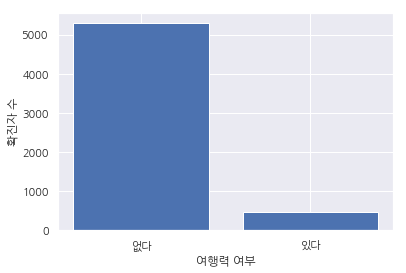

In [43]:
# matplotlib의 bar 함수를 사용하여 막대 그래프를 출력
plt.rc('font', family="NanumGothic")

# x축, y축 명칭을 설정
plt.ylabel('확진자 수')
plt.xlabel('여행력 여부')

# 그래프 x축에 해당되는 데이터와 y축에 해당되는 데이터를 list 형태로 입력
plt.bar(['있다', '없다'], [sum_travel_yes, sum_travel_no])

#### 여행력이 없는 사람들이 대부분인데, 확진자를 대표하는 데이터가 맞을까?

#### 3.3.2. 여행지 분포 출력

459개의 여행지 데이터에서 중복을 제외한 모든 종류의 여행지를 출력

In [49]:
# set 함수를 사용하여 중복을 제외한 여행지를 출력
set(df_corona['여행력'])

{'UAE',
 nan,
 '나이지리아',
 '네팔',
 '독일',
 '독일프랑스',
 '러시아',
 '말레이시아',
 '멕시코',
 '멕시코 미국',
 '모로코 터키',
 '모로코 프랑스 오스트리아',
 '몰타',
 '미국',
 '미국 뉴욕',
 '미국 멕시코',
 '미국 브라질',
 '미국 캐나다',
 '미국 캐나다 멕시코',
 '방글라데시',
 '베트남',
 '브라질',
 '브라질 아르헨티아 칠레 볼리비아',
 '사우디아라비아',
 '스페인',
 '스페인 카타르',
 '스페인 프랑스',
 '스페인체코',
 '싱가포르',
 '아랍에미리트',
 '아르헨티나 볼리비아 브라질',
 '아일랜드',
 '에콰도르',
 '에티오피아',
 '영국',
 '영국 프랑스',
 '오스트리아',
 '요르단',
 '우간다',
 '우즈베키스탄',
 '우크라이나',
 '우한 교민',
 '우한교민',
 '이라크',
 '이란',
 '이집트',
 '이탈리아',
 '이탈리아 독일 홍콩',
 '이탈리아 프랑스',
 '인도',
 '인도네시아',
 '일본',
 '중국',
 '중국 우한시',
 '중국 청도',
 '체코',
 '체코 헝가리 오스트리아 이탈리아 프랑스',
 '카자흐스탄',
 '카타르',
 '캐나다',
 '케냐',
 '콩코 프랑스',
 '쿠웨이트',
 '키르기스스탄',
 '키르기즈스탄',
 '태국',
 '터키',
 '파라과이',
 '파키스탄',
 '팔라우',
 '페루',
 '페루 미국',
 '포르투칼',
 '폴란드',
 '프랑스',
 '프랑스 독일',
 '프랑스 스페인',
 '프랑스 스페인 독일 이탈리아 네덜란드',
 '필리핀',
 '필리핀 마닐라',
 '호주 인도네시아',
 '홍콩'}

`value_counts` 함수를 사용하여 도수 분포표를 출력

In [45]:
# 출력 결과를 모두 볼 수 있도록 세팅
pd.set_option('display.max_rows', None)

# value_counts 함수를 사용하여 도수 분포표를 출력
df_corona['여행력'].value_counts()

미국                       153
영국                        50
필리핀                       25
프랑스                       13
우즈베키스탄                    13
인도                        13
스페인                       12
이라크                       10
카자흐스탄                     10
일본                        10
인도네시아                      7
멕시코                        7
키르기스스탄                     6
태국                         6
브라질                        5
체코                         5
캐나다                        5
러시아                        5
파키스탄                       4
폴란드                        4
이탈리아                       4
중국 우한시                     4
독일                         4
베트남                        3
방글라데시                      3
터키                         3
네팔                         3
페루                         3
UAE                        3
필리핀 마닐라                    2
아랍에미리트                     2
이집트                        2
멕시코 미국                     2
우크라이나                      2
프랑스 독일        

위 결과는 여러 나라의 여행력이 있는 사람들의 결과를 고려하지 않았다.

예를 들어 `이탈리아 프랑스` 데이터의 경우와 `이탈리아`는 다른 값으로 고려되어 따로 도수를 계산하게 됨.

따라서 나라별로 도수를 구하기 위해서 아래와 같은 코드를 사용

In [50]:
list_country = []
country = '미국 브라질'
country.split(' ')

['미국', '브라질']

In [51]:
list_country + country.split(' ')

['미국', '브라질']

In [52]:
# list_country: [미국, 브라질, 미국, 영국, 미국, 미국, 카자흐..., ....]  

In [53]:
list_country = []
for country in df_corona['여행력']:
    if type(country) == str:
        list_country = list_country + country.split(' ')
        
se_country = pd.Series(list_country) 
se_country.value_counts()

미국         161
영국          51
필리핀         27
프랑스         24
스페인         16
우즈베키스탄      13
인도          13
멕시코         11
카자흐스탄       10
일본          10
이라크         10
이탈리아         9
독일           8
브라질          8
인도네시아        8
캐나다          7
중국           7
체코           6
키르기스스탄       6
태국           6
러시아          5
폴란드          4
터키           4
페루           4
파키스탄         4
우한시          4
오스트리아        3
네팔           3
방글라데시        3
UAE          3
베트남          3
홍콩           2
쿠웨이트         2
모로코          2
카타르          2
우크라이나        2
아일랜드         2
에콰도르         2
아랍에미리트       2
볼리비아         2
마닐라          2
이집트          2
사우디아라비아      2
팔라우          2
뉴욕           1
청도           1
포르투칼         1
요르단          1
에티오피아        1
교민           1
우한           1
호주           1
헝가리          1
이란           1
우간다          1
몰타           1
콩코           1
키르기즈스탄       1
파라과이         1
아르헨티나        1
말레이시아        1
싱가포르         1
아르헨티아        1
스페인체코        1
케냐           1
나이지리아        1
네덜란드      

### 3.4. 접촉력

`접촉력` 데이터를 출력해보면 코로나를 접촉한 방식을 설명하는 문자열 데이터임을 알 수 있다.

In [56]:
df_corona['접촉력'].head() 

0     감염경로 조사중
1    강남서초 지인모임
2    기타 확진자 접촉
3     감염경로 조사중
4    기타 확진자 접촉
Name: 접촉력, dtype: object

In [64]:
df_corona['접촉력'].unique()[0:10]

array(['감염경로 조사중', '강남서초 지인모임', '기타 확진자 접촉', '관악구 삼모스포렉스Ⅱ',
       '도봉구 예마루데이케어센터', '도봉구 다나병원', '강남구 CJ텔레닉스', '해외 유입', '타시도 확진자 접촉',
       '송파구 잠언의료기'], dtype=object)

In [65]:
df_corona['접촉력'].nunique() # 총 295가지의 접촉 방식

295

#### 3.4.1. 접촉력 도수분포표

확진자의 접촉력은 다양하게 기록되었으며

도수분포표를 사용하여 정리한다.

In [68]:
df_corona['접촉력'].value_counts().head(10)

기타 확진자 접촉        818
성북구 사랑제일교회 관련    641
확인 중             586
해외 접촉 추정         415
감염경로 조사중         373
타시도 확진자 접촉       244
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
도봉구 다나병원          68
Name: 접촉력, dtype: int64

### 3.5. 상태

`접촉력` 데이터를 출력해보면 현재 환자 상태를 확인할 수 있는 문자열 데이터임을 알 수 있다.

In [77]:
df_corona.head(2)

,연번,확진달,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부
0,5748,10,21,25530,양천구,NaN,감염경로 조사중,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10,21,25528,강동구,NaN,강남서초 지인모임,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [78]:
df_corona['상태'].tail()

5743    퇴원
5744    퇴원
5745    퇴원
5746    퇴원
5747    퇴원
Name: 상태, dtype: object

#### 3.5.1. 상태별 확진자 수 출력

중복을 제외한 모든 종류의 상태를 출력

In [70]:
set(df_corona['상태'])

{nan, '사망', '퇴원'}

각 상태에 따른 확진자 수

In [71]:
sum_status_death = len(df_corona[df_corona['상태']=='사망'])
print("사망자 수: {}".format(sum_status_death))

sum_status_discharge = len(df_corona[df_corona['상태']=='퇴원'])
print("퇴원자 수: {}".format(sum_status_discharge))

sum_status_nan = sum(df_corona['상태'].isnull())
print("상태를 알 수 없는 사람들의 수: {}".format(sum_status_nan))

사망자 수: 74
퇴원자 수: 5283
상태를 알 수 없는 사람들의 수: 391


최종적으로 상태에 따른 확진자 수를 막대 그래프로 표현

<Container object of 3 artists>

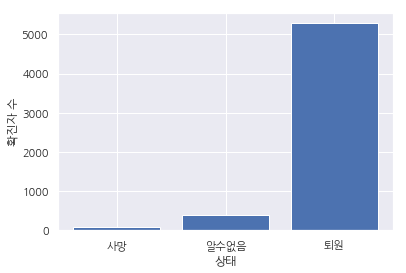

In [72]:
plt.rc('font', family="NanumGothic")
plt.ylabel('확진자 수')
plt.xlabel('상태')
plt.bar(['퇴원', '사망','알수없음'], [sum_status_discharge, sum_status_death, sum_status_nan])

### 3.6. 노출여부

`노출여부` 데이터를 출력해보면 `Y`값만 가지고 있는 문자열 데이터임을 알 수 있음

In [73]:
df_corona['노출여부'].unique()

array(['Y'], dtype=object)

In [74]:
type(df_corona['노출여부'].unique())

numpy.ndarray

In [75]:
set(df_corona['노출여부'])

{'Y'}

In [76]:
type(set(df_corona['노출여부']))

set